In [67]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

import numpy as np

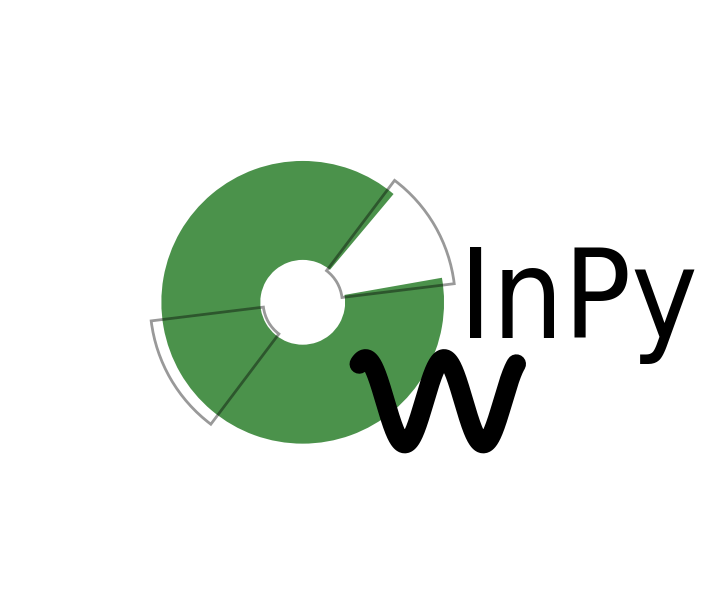

In [146]:
fig = plt.figure(figsize=(4, 4), dpi=200)
ax = fig.add_subplot(111, aspect='equal')

sw = 50
ew = 10
cw = 3
wedge1 = Wedge((0, 0), 1, sw, ew, width=0.7, facecolor="darkgreen", alpha=0.7)
wedge2 = Wedge((0, 0), 1.08, ew+180-cw, sw+180+cw, width=0.8, facecolor="none", edgecolor=(0,0,0,0.4))
wedge3 = Wedge((0, 0), 1.08, ew-cw, sw+cw, width=0.8, facecolor="none", edgecolor=(0,0,0,0.4))

#ax.axis("equal")
ax.add_artist(wedge1)
ax.add_artist(wedge2)
ax.add_artist(wedge3)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

f = 1.8
phi0 = -0.5
xstart = 0.4
xend = xstart + (1 / f) * 2
xvalues = np.linspace(xstart, xend, 1000)
offset = -0.7
scale = 0.3
ax.plot(
    xvalues,
    offset + scale * np.cos(2.0 * np.pi * f * (xvalues - xvalues[0]) + phi0),
    'k',
    solid_capstyle='round',
    lw=7,
)

ax.text(xvalues[int(len(xvalues)//2)]+0.15, -0.25, "InPy", fontsize=45, fontstretch="ultra-condensed")
plt.tight_layout()

ax.axis("off");

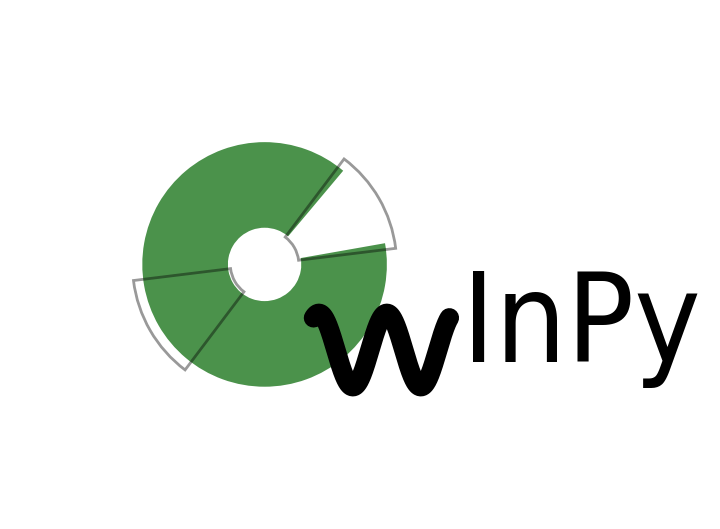

In [147]:
fig = plt.figure(figsize=(4, 4), dpi=200)
ax = fig.add_subplot(111, aspect='equal')

sw = 50
ew = 10
cw = 3
wedge1 = Wedge((0, 0), 1, sw, ew, width=0.7, facecolor="darkgreen", alpha=0.7)
wedge2 = Wedge((0, 0), 1.08, ew+180-cw, sw+180+cw, width=0.8, facecolor="none", edgecolor=(0,0,0,0.4))
wedge3 = Wedge((0, 0), 1.08, ew-cw, sw+cw, width=0.8, facecolor="none", edgecolor=(0,0,0,0.4))

#ax.axis("equal")
ax.add_artist(wedge1)
ax.add_artist(wedge2)
ax.add_artist(wedge3)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

f = 1.8
phi0 = -0.5
xstart = 0.4
xend = xstart + (1 / f) * 2
xvalues = np.linspace(xstart, xend, 1000)
offset = -0.7
scale = 0.3
ax.plot(
    xvalues,
    offset + scale * np.cos(2.0 * np.pi * f * (xvalues - xvalues[0]) + phi0),
    'k',
    solid_capstyle='round',
    lw=7,
)

ax.text(xvalues[-1]+0.1, offset - 0.1, "InPy", fontsize=45, fontstretch="ultra-condensed")
plt.tight_layout()

ax.axis("off");